In [1]:
import pandas as pd
import numpy as np

# train.csv 읽어 df 에 저장
df = pd.read_csv('train.csv')
# 5개 출력
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Pclass Sex Embarked만 추출해서 5개 출력
# 값이 여러개라서 [[ ]]
df[['Pclass','Sex','Embarked']].head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [3]:
# test.csv 읽어 df 에 저장
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
F2             3
              ..
E77            1
C50            1
E68            1
D50            1
D9             1
Name: Cabin, Length: 147, dtype: int64

In [7]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
# Age: 비어있는 값을 나이의 평균으로 채우기
df['Age']=df['Age'].fillna(df['Age'].mean())
# NaN 가장 많은 값으로 대체
df['Embarked'].value_counts()
df['Embarked']=df['Embarked'].fillna('S')
# Cabin(객실) 정보에서 번호만 삭제하고 알파벳만 남기기
df['Cabin'] = df['Cabin'].str[0]
# NaN 가장 많은 값으로 대체
df['Cabin'].value_counts()
df['Cabin']=df['Cabin'].fillna('C')

# sibSp와 Parch를 더하여 FamilySize 생성 (훈련용,테스트용)
df['FamilySize'] = df['SibSp']+df['Parch']

In [9]:
# Age: 비어있는 값을 나이의 평균으로 채우기
test_df['Age']= test_df['Age'].fillna(df['Age'].mean())
# Fare 빈칸 (NaN) 을 평균으로 대체
test_df['Fare']=test_df['Fare'].fillna(df['Fare'].mean())
# NaN 가장 많은 값으로 대체
df['Embarked'].value_counts()
test_df['Embarked']=test_df['Embarked'].fillna('S')
# Cabin(객실) 정보에서 번호만 삭제하고 알파벳만 남기기
test_df['Cabin'] = test_df['Cabin'].str[0]
# NaN 가장 많은 값으로 대체
test_df['Cabin'].value_counts()
test_df['Cabin']=test_df['Cabin'].fillna('C')

# sibSp와 Parch를 더하여 FamilySize 생성 (훈련용,테스트용)
test_df['FamilySize'] = test_df['SibSp']+test_df['Parch']

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

In [11]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,0


In [13]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,C,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,C,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,C,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,C,S,2


In [14]:
#문자를 숫자로 변환(C==>0 B==>1 D==>2 E==>3)
# df.loc[['Cabin']=='c','Cabin'] = 0
# df.loc[['Cabin']=='B','Cabin'] = 1

df['Cabin'] = df['Cabin'].map({
    'C':0,
    'B':1,
    'D':2,
    'E':3,
    'A':4,
    'F':5,
    'G':6,
    'T':7
})
test_df['Cabin'] = test_df['Cabin'].map({
    'C':0,
    'B':1,
    'D':2,
    'E':3,
    'A':4,
    'F':5,
    'G':6,
    'T':7
})


In [15]:
df['Cabin'].value_counts()

0    746
1     47
2     33
3     32
4     15
5     13
6      4
7      1
Name: Cabin, dtype: int64

In [16]:
test_df['Cabin'].value_counts()

0    362
1     18
2     13
3      9
5      8
4      7
6      1
Name: Cabin, dtype: int64

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0


In [18]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
#Embarked의 문자를 숫자로 변환 S==>0 C==>1 Q==>2
df['Embarked'] = df['Embarked'].map({
    'S':0,
    'C':1,
    'Q':2
})
test_df['Embarked'] = test_df['Embarked'].map({
    'S':0,
    'C':1,
    'Q':2
})


In [20]:
df['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [21]:
df['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [22]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,2,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,0,2


In [23]:
#Sex의 문자를 숫자로 변환 male==>0 female==>1
df['Sex'] = df['Sex'].map({
    'male':0,
    'female':1
    
})
test_df['Sex'] = test_df['Sex'].map({
    'male':0,
    'female':1
    
})


In [24]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,2


In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,0


In [26]:
# 더 이상 필요 없는 열 삭제 'Name','Ticket','SibSp','Parch','PassengerId'
train = df.drop(['Name','Ticket','SibSp','Parch','PassengerId'],axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,0,1
1,1,1,1,38.0,71.2833,0,1,1
2,1,3,1,26.0,7.9250,0,0,0
3,1,1,1,35.0,53.1000,0,0,1
4,0,3,0,35.0,8.0500,0,0,0


In [27]:
# 더 이상 필요 없는 열 삭제 'Name','Ticket','SibSp','Parch','PassengerId'
test = test_df.drop(['Name','Ticket','SibSp','Parch','PassengerId'],axis = 1)
test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,3,0,34.5,7.8292,0,2,0
1,3,1,47.0,7.0000,0,0,1
2,2,0,62.0,9.6875,0,2,0
3,3,0,27.0,8.6625,0,0,0
4,3,1,22.0,12.2875,0,0,2


In [28]:
#Training set
#모델의 학습에 사용되는 데이터

# Validation set
# 모델 제작 과정 중, 학습된 모델의 성능을 측정하기 위한 데이터

# test set 모델의 최종성능을 평가하기 위한 데이터

In [29]:
#훈련용 데이터에서 데이터 ,label(target)분리
train_data = train.drop('Survived',axis=1)#학습용데이터분리
target_data = train['Survived']#학습용데이터의 label(target)
target_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
# x : 내 데이터 train훈련용 valid 검증용 y : 정답 train훈련용 valid 검증용  
x_train, x_valid ,y_train, y_valid = train_test_split(train_data,target_data)
print(train_data.shape,x_train.shape,x_valid.shape)

(891, 7) (668, 7) (223, 7)


In [31]:
# sklearn의 Decision Tree Classifier 를 사용하여 학습
from sklearn.tree import DecisionTreeClassifier

# Decision Tree 로 모델 생성
tree_dec = DecisionTreeClassifier()

# 학습
tree_dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
# 학습용 정확도 확인
# 너무 정확하게 나와도 안 좋음
print('Training set accuracy : ',tree_dec.score(x_train,y_train))
print('Validation set accuracy : ',tree_dec.score(x_valid,y_valid))

Training set accuracy :  0.9895209580838323
Validation set accuracy :  0.7668161434977578


In [33]:
# 정확도 비교

In [34]:
#만들어진 DecisionTree로 data 판단
prediction = tree_dec.predict(test)
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [35]:
submit = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': prediction
})
# 번호 index=False
submit.to_csv('survived.csv',index=False)

In [36]:
my_prediction = pd.read_csv('survived.csv')
my_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


[Text(555.5161700581396, 903.1172727272728, 'Sex <= 0.5\ngini = 0.47\nsamples = 668\nvalue = [416, 252]\nclass = Unsurvived'),
 Text(215.36664244186045, 861.1118181818183, 'Age <= 13.0\ngini = 0.289\nsamples = 434\nvalue = [358, 76]\nclass = Unsurvived'),
 Text(34.604651162790695, 819.1063636363638, 'FamilySize <= 3.5\ngini = 0.495\nsamples = 31\nvalue = [14, 17]\nclass = Survived'),
 Text(17.302325581395348, 777.1009090909092, 'FamilySize <= 0.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]\nclass = Survived'),
 Text(8.651162790697674, 735.0954545454547, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Unsurvived'),
 Text(25.95348837209302, 735.0954545454547, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = Survived'),
 Text(51.90697674418604, 777.1009090909092, 'FamilySize <= 5.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = Unsurvived'),
 Text(43.25581395348837, 735.0954545454547, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = Unsurvived'),
 Text(60.558139534883715, 73

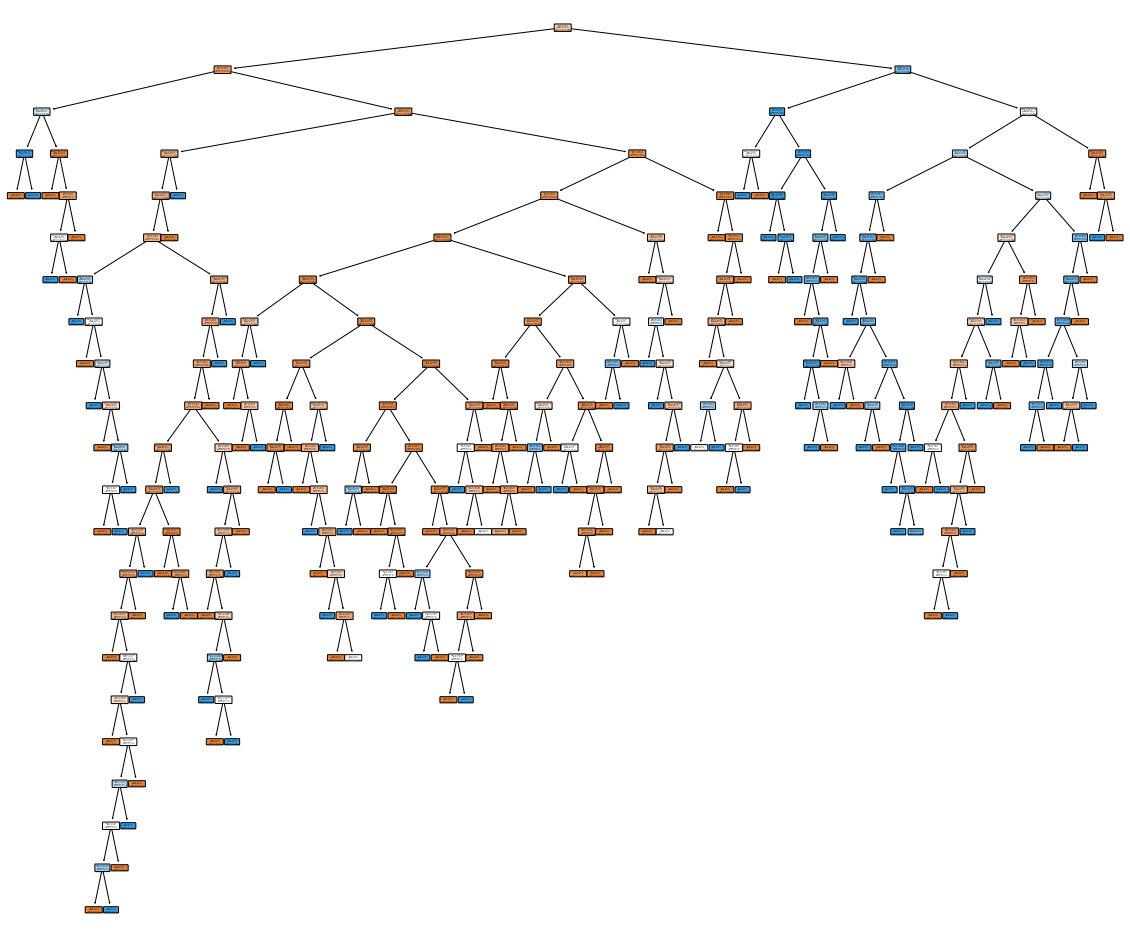

In [37]:
#시각화
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,17))
feature_name=['Pclass','Sex','Age','Fare','Cabin','Embarked','FamilySize']
tree.plot_tree(tree_dec,
              class_names=['Unsurvived','Survived'],
              feature_names=feature_name,
              impurity=True,
              filled=True,
              rounded=True)

In [38]:
# 중요도 확인하기
print("importance : ",tree_dec.feature_importances_)
# 순서 'Pclass','Sex','Age','Fare','Cabin','Embarked','FamilySize'(항목에 대한 중요도 숫자가 높은것이 중요하다)

importance :  [0.09665258 0.33194139 0.19440963 0.24099081 0.01319757 0.01045147
 0.11235655]


In [39]:
# (항목에 대한 중요도 숫자가 높은것이 중요하다)
for name, value in zip(feature_name, tree_dec.feature_importances_):
    print('{0}: {1:.3f}'.format(name,value))

Pclass: 0.097
Sex: 0.332
Age: 0.194
Fare: 0.241
Cabin: 0.013
Embarked: 0.010
FamilySize: 0.112


<AxesSubplot:>

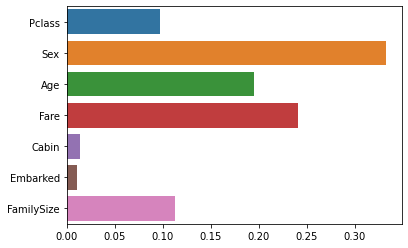

In [40]:
import seaborn as sns
sns.barplot(x=tree_dec.feature_importances_, y=feature_name)

In [ ]:
# 훈련용이랑 테스트용 끼리 비교를 해서 정확도를 확인한다.
#어제한 건 일반적인 경우의 방법
#오늘한 것은 상황들을 여러가지를 주고 그 중에 최적을 찾아서 해보는 경우다.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [42]:
# parameters = {
#     'max_depth': [8, 10, 12, 15],
#     'min_samples_split': [4, 5, 7],
#     'min_samples_leaf': [1, 2, 3]
# }

parameters = {
    'max_depth': [2, 3, 5, 8],
    'min_samples_split': [7, 8, 9],
    'min_samples_leaf': [1, 2, 3]
}

In [43]:
grid_dclf = GridSearchCV(
    tree_dec, param_grid=parameters, scoring='accuracy', cv=5)

grid_dclf.fit(x_train, y_train)
print(grid_dclf)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [7, 8, 9]},
             scoring='accuracy')


In [44]:
print(f'GridSearcCV 최적의 하이퍼 파라미터 : {grid_dclf.best_params_}')

GridSearcCV 최적의 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 9}


In [45]:
grid_dclf.fit(x_train,y_train)
# 훈련 fit

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [7, 8, 9]},
             scoring='accuracy')

In [46]:
print(f'GridSearcCV 최고정확도 : {grid_dclf.best_score_:.4f}') #소수점 4자리로?
print(f'GridSearcCV 최고정확도 : {grid_dclf.best_score_}')

GridSearcCV 최고정확도 : 0.8383
GridSearcCV 최고정확도 : 0.8382785321512737


In [47]:
# 테스트용
best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(x_valid)
accuracy = accuracy_score(y_valid,dpredictions)
print(f'테스트에서의 DecisionTreeClassifier정확도 : {round(accuracy,4)}')

테스트에서의 DecisionTreeClassifier정확도 : 0.7803


In [48]:
# tree_dec(검증용)
tree_dec.fit(x_train,y_train)
dt_pred = tree_dec.predict(x_valid)
print('tree_dec DecisionTreeClassifier정확도 : {0:.4f}'.format(accuracy_score(y_valid,dt_pred)))

tree_dec DecisionTreeClassifier정확도 : 0.7578


In [49]:
y_valid.shape

(223,)

In [50]:
# 테스트용
length = y_valid.shape[0]
accuracy = accuracy_score(y_valid, dpredictions)
print(f'총{length}명 중 {accuracy * 100:.3f}% 정확도로 생존을 맞춤')

총223명 중 78.027% 정확도로 생존을 맞춤


In [51]:
# tree_dec(검증용)
best_accuracy = accuracy_score(y_valid, dt_pred)
print(f'총{length}명 중 {best_accuracy * 100:.3f}% 정확도로 생존을 맞춤')

총223명 중 75.785% 정확도로 생존을 맞춤


[Text(558.0, 808.6050000000001, 'Sex <= 0.5\ngini = 0.47\nsamples = 668\nvalue = [416, 252]\nclass = Unsurvived'),
 Text(279.0, 577.575, 'Age <= 13.0\ngini = 0.289\nsamples = 434\nvalue = [358, 76]\nclass = Unsurvived'),
 Text(139.5, 346.5450000000001, 'FamilySize <= 3.5\ngini = 0.495\nsamples = 31\nvalue = [14, 17]\nclass = Survived'),
 Text(69.75, 115.51499999999999, 'gini = 0.111\nsamples = 17\nvalue = [1, 16]\nclass = Survived'),
 Text(209.25, 115.51499999999999, 'gini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = Unsurvived'),
 Text(418.5, 346.5450000000001, 'Pclass <= 1.5\ngini = 0.25\nsamples = 403\nvalue = [344, 59]\nclass = Unsurvived'),
 Text(348.75, 115.51499999999999, 'gini = 0.415\nsamples = 92\nvalue = [65, 27]\nclass = Unsurvived'),
 Text(488.25, 115.51499999999999, 'gini = 0.185\nsamples = 311\nvalue = [279, 32]\nclass = Unsurvived'),
 Text(837.0, 577.575, 'Pclass <= 2.5\ngini = 0.373\nsamples = 234\nvalue = [58, 176]\nclass = Survived'),
 Text(697.5, 346.545000000000

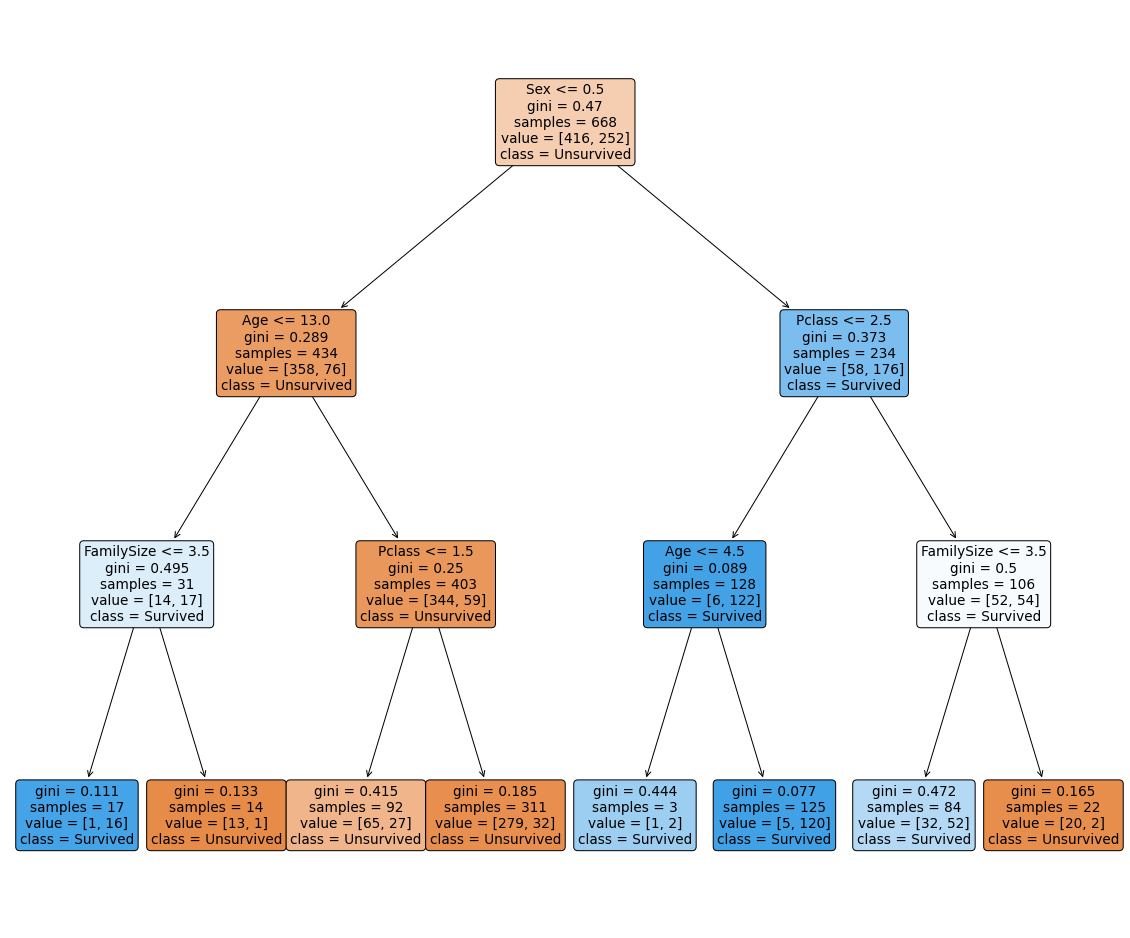

In [52]:
#시각화  : 하이퍼파라미터 적용한 모델
#시각화
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,17))
feature_name=['Pclass','Sex','Age','Fare','Cabin','Embarked','FamilySize']
tree.plot_tree(best_dclf,
              class_names=['Unsurvived','Survived'],
              feature_names=feature_name,
              impurity=True,
              filled=True,
              rounded=True)

In [53]:
# 훈련용이랑 테스트용 끼리 비교를 해서 정확도를 확인한다.
#어제한 건 일반적인 경우의 방법
#오늘한 것은 상황들을 여러가지를 주고 그 중에 최적을 찾아서 해보는 경우다.